[*********************100%***********************]  1 of 1 completed

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step



d:\Anaconda\Lib\site-packages\tensorflow\python\data\ops\structured_function.py:258: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


📍 Symbol: TCS.NS
⏱️ Timestamp: 2025-04-24 17:14:34.271974
💵 Current Price: ₹Ticker
TCS.NS    3401.6
Name: 372, dtype: float64
🔮 Predicted Price (5 min ahead): ₹3408.949951171875


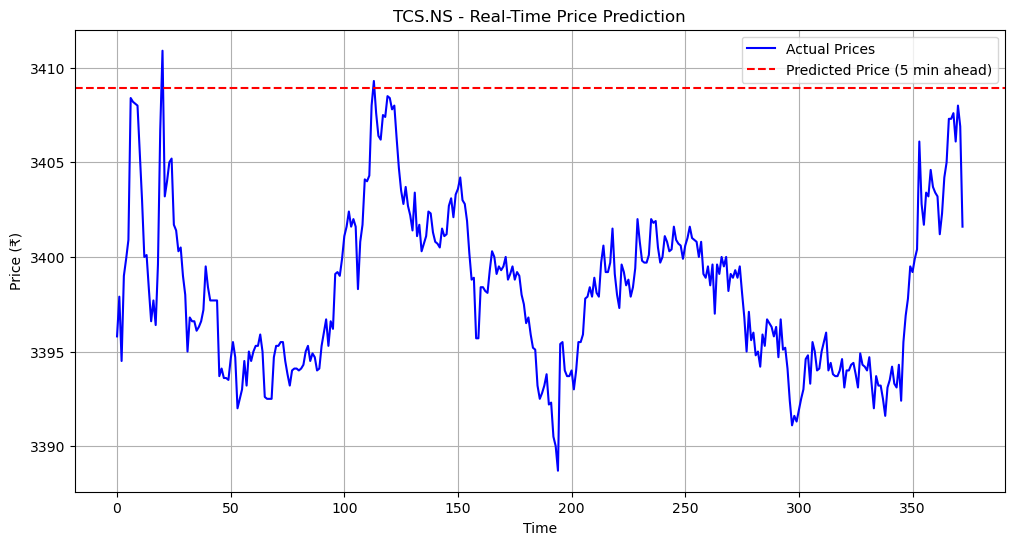

⏳ Waiting for the next update...


KeyboardInterrupt: 

In [8]:

import yfinance as yf
import numpy as np
import joblib
from tensorflow.keras.models import load_model
from datetime import datetime
import time

# Load the model and scaler
model = load_model('model/stock_model.h5')
scaler = joblib.load('model/scaler.save')
print("✅ Model and scaler loaded successfully.")

# Parameters
symbol = 'TCS.NS'  # Replace with your stock symbol
SEQUENCE_LENGTH = 30  # Same as used during training

# Real-time prediction loop
import matplotlib.pyplot as plt

def fetch_data_with_retry(symbol, retries=3, wait_time=60):
    for attempt in range(retries):
        try:
            # Fetch data
            df = yf.download(symbol, period='1d', interval='1m')
            return df
        except Exception as e:
            print(f"⚠️ Error fetching data: {e}. Retrying in {wait_time} seconds...")
            time.sleep(wait_time)
    raise Exception("❌ Failed to fetch data after multiple retries.")


# Real-time prediction loop
while True:
    try:
        # Clear the output for a clean display
        from IPython.display import clear_output
        clear_output(wait=True)

        # 📥 Fetch real-time data
        df = fetch_data_with_retry('TCS.NS') # 1 day of 1-minute data
        df = df[['Close']].dropna().reset_index()

        # 🧼 Preprocess the data
        scaled_data = scaler.transform(df[['Close']])
        latest_sequence = scaled_data[-SEQUENCE_LENGTH:].reshape(1, SEQUENCE_LENGTH, 1)

        # 🔮 Predict the next price
        prediction = model.predict(latest_sequence)
        predicted_price = scaler.inverse_transform(prediction).flatten()[0]  # Convert back to original scale
        current_price = df['Close'].iloc[-1]

        # 📊 Display the results
        print(f"📍 Symbol: {symbol}")
        print(f"⏱️ Timestamp: {datetime.now()}")
        print(f"💵 Current Price: ₹{round(current_price, 2)}")
        print(f"🔮 Predicted Price (5 min ahead): ₹{round(predicted_price, 2)}")

        # 📈 Plot the results
        plt.figure(figsize=(12, 6))
        plt.plot(df['Close'], label='Actual Prices', color='blue')
        plt.axhline(y=predicted_price, color='red', linestyle='--', label='Predicted Price (5 min ahead)')
        plt.title(f"{symbol} - Real-Time Price Prediction")
        plt.xlabel('Time')
        plt.ylabel('Price (₹)')
        plt.legend()
        plt.grid(True)
        plt.show()

        # ⏳ Wait before fetching new data (e.g., 5 minutes)
        print("⏳ Waiting for the next update...")
        time.sleep(20)

    except Exception as e:
        print(f"❌ Error during real-time prediction: {e}")
        break

In [12]:
from flask import Flask, request, jsonify
import yfinance as yf
import numpy as np
import joblib
from tensorflow.keras.models import load_model
from datetime import datetime

# Initialize Flask app
app = Flask(__name__)

# Load the model and scaler
model = load_model('model/stock_model.h5')
scaler = joblib.load('model/scaler.save')
print("✅ Model and scaler loaded successfully.")

# Parameters
SEQUENCE_LENGTH = 30  # Same as used during training

# Function to fetch real-time data
def fetch_real_time_data(symbol):
    try:
        # Fetch real-time data
        df = yf.download(symbol, period='1d', interval='1m')
        df = df[['Close']].dropna().reset_index()
        return df
    except Exception as e:
        raise Exception(f"Error fetching data for {symbol}: {e}")

# Define the prediction endpoint
@app.route('/predict', methods=['GET'])
def predict():
    try:
        # Get the stock symbol from the request
        symbol = request.args.get('symbol', default='TCS.NS', type=str)

        # Fetch real-time data
        df = fetch_real_time_data(symbol)

        # Preprocess the data
        scaled_data = scaler.transform(df[['Close']])
        latest_sequence = scaled_data[-SEQUENCE_LENGTH:].reshape(1, SEQUENCE_LENGTH, 1)

        # Make the prediction
        prediction = model.predict(latest_sequence)
        predicted_price = float(scaler.inverse_transform(prediction).flatten()[0])  # Convert to float
        current_price = float(df['Close'].iloc[-1])  # Convert to float

        # Return the prediction as JSON
        return jsonify({
            'symbol': symbol,
            'timestamp': datetime.now().strftime('%Y-%m-%d %H:%M:%S'),
            'current_price': round(current_price, 2),
            'predicted_price': round(predicted_price, 2)
        })

    except Exception as e:
        return jsonify({'error': str(e)}), 500

# Run the Flask app
if __name__ == '__main__':
    app.run(debug=False)

✅ Model and scaler loaded successfully.
 * Serving Flask app '__main__'
 * Debug mode: off


INFO:werkzeug:WARNING: This is a development server. Do not use it in a production deployment. Use a production WSGI server instead.
 * Running on http://127.0.0.1:5000
INFO:werkzeug:Press CTRL+C to quit
INFO:werkzeug:127.0.0.1 - - [24/Apr/2025 17:23:30] "GET / HTTP/1.1" 404 -
INFO:werkzeug:127.0.0.1 - - [24/Apr/2025 17:23:30] "GET /favicon.ico HTTP/1.1" 404 -
[*********************100%***********************]  1 of 1 completed
d:\Anaconda\Lib\site-packages\tensorflow\python\data\ops\structured_function.py:258: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 201ms/step


C:\Users\HP\AppData\Local\Temp\ipykernel_25296\1188699602.py:46: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  current_price = float(df['Close'].iloc[-1])  # Convert to float
INFO:werkzeug:127.0.0.1 - - [24/Apr/2025 17:23:35] "GET /predict?symbol=TCS.NS HTTP/1.1" 200 -


In [10]:
%tb

SystemExit: 1